In neuroscience, the study of cerebral networks both in healthy life or in the context of a disease is really common and necessary to shed light on the mechanisms of the brain after a cognitive process, such as learning or reasoning, or as a response to brain damage. However, most studies focus on topological characteristics of brain structural or functional connectivity metrics that limits our knowledge of how they really work. In this way, the integrated information from both structural (FA-weighted connectivity and GM networks) and functional connections can provide further knowledge of brain organization in the context of brain damage. 

Patients with relapsing-remitting or secondary progressive MS aged between 18 and 65 years were recruited at the MS Unit in the Hospital Clinic of Barcelona. We included a cohort of 147 patients with a diagnosis of MS according to 2010 McDonald criteria (Polman et al. 2011) and 18 HV without a previous or present history of neurological or psychiatric diseases. Physical disability was evaluated using the Expanded Disability Status Scale (EDSS). The Ethics Committee of the Hospital Clinic of Barcelona approved the study, and all participants signed an informed consent.


## Acquisition details

MRI acquisition protocols were acquired on a 3T Magnetom Trio scanner (SIEMENS, Erlanger, Germany) using a 32 channel phased-array head coil.  In part of the cohort (n=71 participants), the high-resolution three-dimensional Magnetization-Prepared Rapid Acquisition with Gradient Echo (3D-MPRAGE) was acquired with TR = 1800 ms; TE = 3.01 ms; TI = 900 ms; 240 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size; and the three-dimensional Fluid Attenuated Inversion Recovery (3D-T2 FLAIR) with TR = 5000 ms; TE = 304 ms; TI = 1800 ms; 192 sagittal slices with 0.94 mm isotropic voxel size and a 256 × 256 matrix size. The Diffusion-Weighted Imaging (DWI) had a TR = 14800 ms; TE = 103 ms; 100 contiguous axial slices; 1.5 mm isotropic voxel size; a 154 × 154 matrix size; b value = 1000 s/ mm2; 60 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. The reminding participants (n=94) had a 3D-structural image with TR = 1970 ms; TE = 2.41 ms; TI = 1050 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 x 256 matrix size; and the 3D-T2 FLAIR with TR = 5000 ms; TE = 393 ms; TI = 1800 ms; 208 sagittal slices with 0.9 mm isotropic voxel size and a 256 × 256 matrix size. The DWI acquisition protocol was as follows: TR = 12600 ms; TE = 112 ms; 80 contiguous axial slices; 2 mm isotropic voxel size; a 120 × 120 matrix size; b value = 1500 s/ mm2; 70 diffusion encoding directions and a single baseline image acquired at 0 s/mm2. In addition, field map images were generated in all participants to correct the distortions caused by field inhomogeneities (TE 1/TE 2 = 4.92/7.38 ms, with the same slice prescription, slice thickness and field of view as the DWI sequence). 

For both cohorts, it was acquired the same protocol of resting-state functional MRI (rs-fMRI) using BOLD EPI pulse sequence (fat saturation), with TR = 2000 ms; TE = 19 ms; field of view =  220 mm; 40 contiguous axial slices with 1.7 x 1.7 x 3 mm voxel size; GRAPPA-factor of 4  and a total of 450 frames (TA = 15:14  minutes). 

## Magnetic resonance acquisition and processing

**Anatomical parcellation scheme**

3D-MPRAGE and 3D-FLAIR images were used to perform the delineation of WM lesions through JIM7 software (http://www.xinapse.com/). Subsequently, WM lesions were filled in 3D-MPRAGE with the intensity of the non-lesional neighboring voxels to improve the registration and segmentation processing of MS patients (Battaglini et al. 2012).   Lesion filling approach was used to parcellate the cortex into 62 GM regions and 14 subcortical regions by Mindboggle software and FSL-FIRST packages respectively (Klein et al. 2017) (Patenaude et al. 2011) . Depiction of those brain regions are considered as the nodes of a brain network.    

1. **Structural white matter brain network**:
To build FA-weighted connectivity matrix is necessary a DWI preprocessing pipeline has been previously described and well-established by (Tournier et al. 2019). Accordingly, the major components of this pipeline included a MP-PCA denoising, Gibbs ringing removal, eddy current and motion correction, geometrically unwarping procedure and lastly a bias field correction. After these corrections, fractional anisotropy (FA) scalar map was computed from the diffusion tensor model using FSL’s DTIFIT (Basser et al. 1994). The connectome construction derived from FA-weighted indices was generated using the result of the high-order probabilistic streamline tractography between distinct cortical and subcortical GM areas (nodes) of the whole brain. To guarantee a biologically plausible reconstructed streamlines, the process of connectome reconstruction has incorporated the anatomical constrained tractography (ACT) framework, a set of 6 million streamlines have been selected and an anatomical exclusion criteria post-processing (Llufriu et al. 2017) (Martínez-Heras et al. 2015). The parcellation scheme (76 nodes) from anatomical image was aligned to the FA map to determine which streamlines connections need to be selected between pairs of nodes for creating the structural connectome. Finally, we defined the mean value of the FA metric along each connection to generate the FA-weighted adjacency matrix (Solana et al. 2019).

2. **Structural gray matter brain network**:
We generated another structural network based on the similarity of GM morphological patterns according to the defined anatomical parcellation scheme (Tijms et al. 2012). To estimate this GM connectivity network, we applied an automated pipeline that included two main steps: (1) Reslicing each individual’s native space GM segmentation to 2mm isotropic voxel to later on define small regions of interest corresponding to 3 x 3 x 3 voxel cube (2) Performing statistical similarity (Pearson’s correlation coefficient) along the corresponding voxel cubes. All correlations corresponding for each node, which between them added up, were stored into a matrix to construct the GM network.    

3. **Functional brain network**:
Brain signal correlation/synchronization through resting-state functional connectivity (rs-fMRI) matrix was obtained following the analyze method (Chou et al. 2012). This includes several preprocessing steps including slice time and motion correction, spatial normalization to standard space and band-pass filtering to retain frequencies between 0.001 and 0.08 Hz using FSL tools (Jenkinson et al. 2012). Finally, the parcellation nodes were used to extract the average time-series for each of the 76 regions resulting in a functional connectivity matrix.   

## 1. Load the Data

In [1]:
from load_data import data_loader

full_dataset, fa, func, gm = data_loader(unzip=False)

In [2]:
import pandas as pd
clinical_data = pd.read_excel("/home/eloydelas/Desktop/CapstoneProject/Capstone_Project/Eloy/data/subject_clinical_data.xlsx")

In [3]:
#Overview of clincal information data
clinical_data.describe()

,controls_ms,age,sex,dd,mstype,dmd,edss,uGMSSS,oGMSSS,sdmt,sdmtz,pasat,zpasat,zverbalmemory,zvisualmemory,zattention,zfluency,zglobal
count,165.000000,165.000000,165.000000,165.000000,165.000000,146.000000,165.000000,147.000000,147.000000,122.000000,122.000000,136.000000,125.000000,64.000000,64.000000,62.000000,64.000000,62.000000
mean,0.890909,46.161529,0.278788,14.110788,0.060606,2.527397,2.369697,3.031156,2.501483,47.975410,0.079029,44.617647,-0.289255,-0.815819,-0.495052,-0.285719,-0.657595,-0.554303
std,0.312702,10.602227,0.449768,10.051942,0.591577,3.167062,1.802689,2.008814,1.960155,13.351239,1.064729,12.495960,1.333481,1.296972,1.058694,1.038537,1.113514,0.828612
min,0.000000,22.660000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.490000,0.234000,13.000000,-4.166700,8.000000,-5.142900,-3.805600,-3.125000,-3.214300,-3.500000,-3.161200
25%,1.000000,38.210000,0.000000,7.750000,0.000000,0.000000,1.500000,1.415000,0.939500,38.000000,-0.538475,38.750000,-0.857100,-1.689450,-1.400000,-0.868000,-1.500000,-0.975425
50%,1.000000,46.330000,0.000000,12.400000,0.000000,1.000000,2.000000,2.530000,1.922000,49.000000,0.198059,48.500000,0.000000,-0.664200,-0.637500,-0.110450,-0.464300,-0.424400
75%,1.000000,53.840000,1.000000,19.600000,0.000000,4.750000,3.000000,4.395000,3.488000,56.000000,0.638425,54.000000,0.700000,0.090250,0.312500,0.414050,0.148850,-0.057925
max,1.000000,72.220000,1.000000,46.130000,2.000000,14.000000,7.500000,9.290000,9.130000,92.000000,3.000000,60.000000,1.750000,1.910300,1.550000,1.987200,1.833300,0.920800


# 2. FA-weighted correction matrices

## Step 1: Preprocessing (age,sex and false positive connections)

In [4]:
import numpy as np
from sklearn import linear_model
from statistics import mean

# create an empty array
fa_corrected = np.zeros(fa.shape)

X = np.array(list(zip(clinical_data['age'], clinical_data['sex'])))
X.shape

#Correct for age and sex the connectivity matrices
for i in range(fa.shape[1]):
    Y = fa.values[:,i] #Extract the values inside matrix
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    y_pred = regr.predict(X)
    residual = (Y - y_pred)
    val_corrected = residual + mean(Y)
    # save values
    fa_corrected[:,i] = val_corrected
    
fa_corrected[fa_corrected < 0.1] = 0

In [5]:
print("Number of negative - zero - positive values are {} - {} - {} / {}".format(len(fa_corrected[fa_corrected < 0]), len(fa_corrected[fa_corrected == 0]), len(fa_corrected[fa_corrected > 0]), fa_corrected.size))

Number of negative - zero - positive values are 0 - 168457 - 302618 / 471075


In [6]:
##Select the index and columns from the original Dataframe
names = fa.index.tolist()
columns = fa.columns.values.tolist()
df=pd.DataFrame(fa_corrected,columns=[columns], index=[names])

In [7]:
# Select HC from the clinic data
num_subjs = clinical_data.shape[0]
ct_control = -1


def get_controls_idx(mstype, ct_control=-1):
  return list(np.where(np.array(mstype)==-1)[0])

controls = get_controls_idx(clinical_data['mstype'], ct_control)

print("Controls indices are [{} of {}]:\n{}".format(len(controls), num_subjs, controls))

#Select the rows belonging to controls cohort
df_HC = df.iloc[controls] # select rows and columns by number, in the order that they appear in the data frame
df_HC.head()

Controls indices are [18 of 165]:
[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 157, 158, 159, 160, 161, 162, 163, 164]


,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,fa-ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,fa-ctx-rh-superiortemporal/ctx-rh-transversetemporal,fa-ctx-rh-superiortemporal/ctx-rh-insula,fa-ctx-rh-supramarginal/ctx-rh-transversetemporal,fa-ctx-rh-supramarginal/ctx-rh-insula,fa-ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
c001MSVIS,0.415356,0.0,0.0,0.0,0.416454,0.460479,0.513861,0.0,0.418106,0.0,...,0.335230,0.384017,0.382393,0.399733,0.358468,46.161529,0.278788,3.504009,0.558290,0.000000
c027MSVIS,0.400464,0.0,0.0,0.0,0.470645,0.458319,0.524846,0.0,0.455811,0.0,...,0.313259,0.372545,0.380318,0.392884,0.352286,46.161529,0.278788,5.791247,1.123704,0.123012
c029MSVIS,0.410177,0.0,0.0,0.0,0.448111,0.000000,0.496964,0.0,0.401597,0.0,...,0.316739,0.357191,0.365815,0.362908,0.318450,46.161529,0.278788,0.000000,0.000000,0.000000
c030MSVIS,0.394410,0.0,0.0,0.0,0.451920,0.000000,0.505629,0.0,0.398886,0.0,...,0.325713,0.398725,0.373416,0.379563,0.338912,46.161529,0.278788,0.000000,0.000000,0.000000
c031MSVIS,0.438183,0.0,0.0,0.0,0.446348,0.460707,0.522138,0.0,0.409560,0.0,...,0.359368,0.381366,0.380666,0.398167,0.360958,46.161529,0.278788,0.232926,0.251084,0.000000


In [8]:
df_HC[df_HC > 0.1] = 1
mask = df_HC.sum(axis = 0, skipna = True)
#bellow 60% values of HC need to be removed the connection
thr = round(df_HC.shape[0]*0.6)
mask[mask < thr] = 0
mask[mask >= thr] = 1
# create an empty array
fa_mask = np.zeros(df.shape)

for num in range(df.shape[0]):
    fa_mask[num,:] = df.values[num,:] * mask # element-wise multiplication

<ipython-input-8-dc118653b9f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HC[df_HC > 0.1] = 1
/home/eloydelas/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2986: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


In [9]:
##Select the index and columns from the original Dataframe
names = fa.index.tolist()
columns = fa.columns.values.tolist()
fa_corr=pd.DataFrame(fa_mask,columns=[columns], index=[names])

## Step 2: Data harmonization (ComBat)

The subjects of this study comes from two different sources: *MSVIS* and *FIS*. In the following sections we'll determine if there is a problem related with "Scanner Effects" (multi-site neuroimaging problems) and, if necessary, we'll apply harmonization techniques.

One of the main studies in detection and harmonizing neuroimaging data belongs to Fortin et al. (2017), *Harmonization of cortical thickness measurements across scanners and sites*. In this project we'll apply the same detection techniques and solutions.

For *Scanner Effects* detection, they used dimensionality reduction techniques, such as *Principal Component Analysis* (PCA)to reduce the feature space to two dimensions. This allows to an easier visualization of the data.

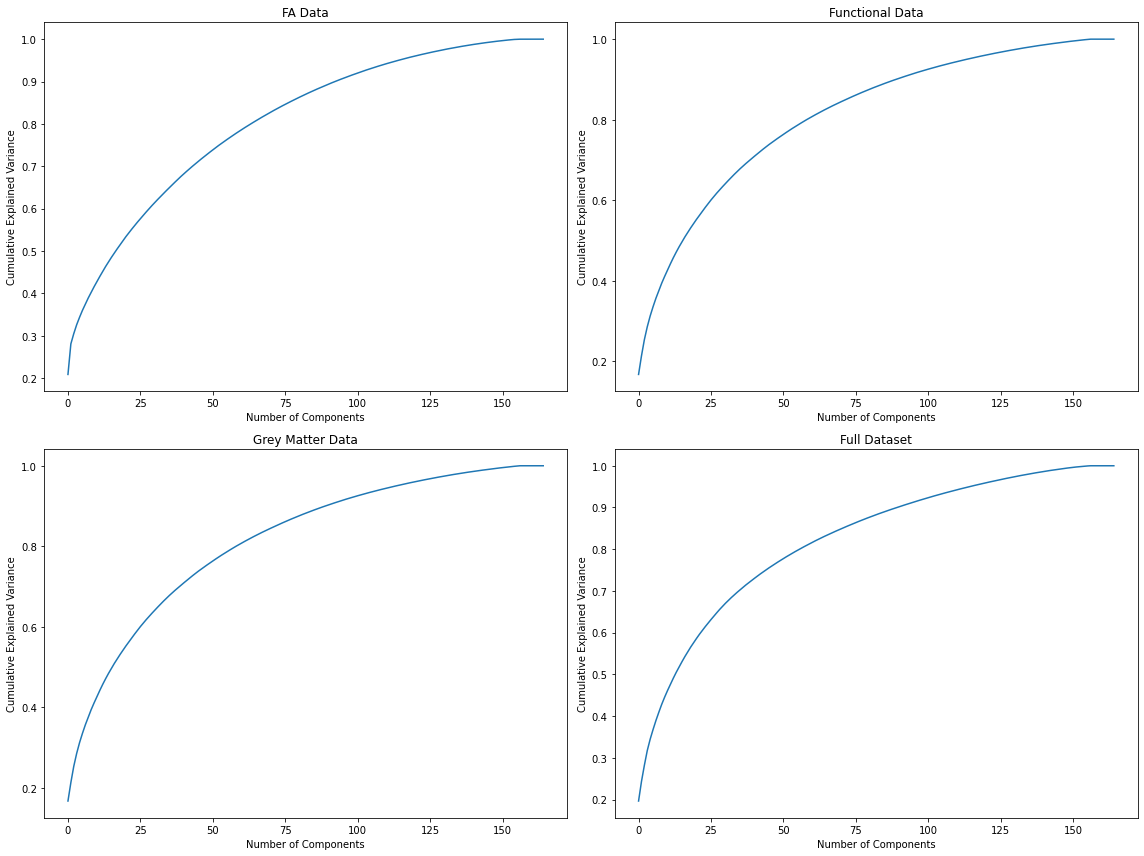

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

data = [fa_corr.iloc[:, :-5], func.iloc[:, :-5], gm.iloc[:, :-5], full_dataset.iloc[:, :-5]] #Remove clinical data
names = ["FA Data", "Functional Data", "Grey Matter Data", "Full Dataset"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i in range(2):
    for j in range(2):
        pca_variables = data[i+j]
        pca = PCA().fit(pca_variables)
        axs[i, j].plot(np.cumsum(pca.explained_variance_ratio_))

for i,ax in enumerate(axs.flat):
    ax.set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title=names[i])

fig.tight_layout()

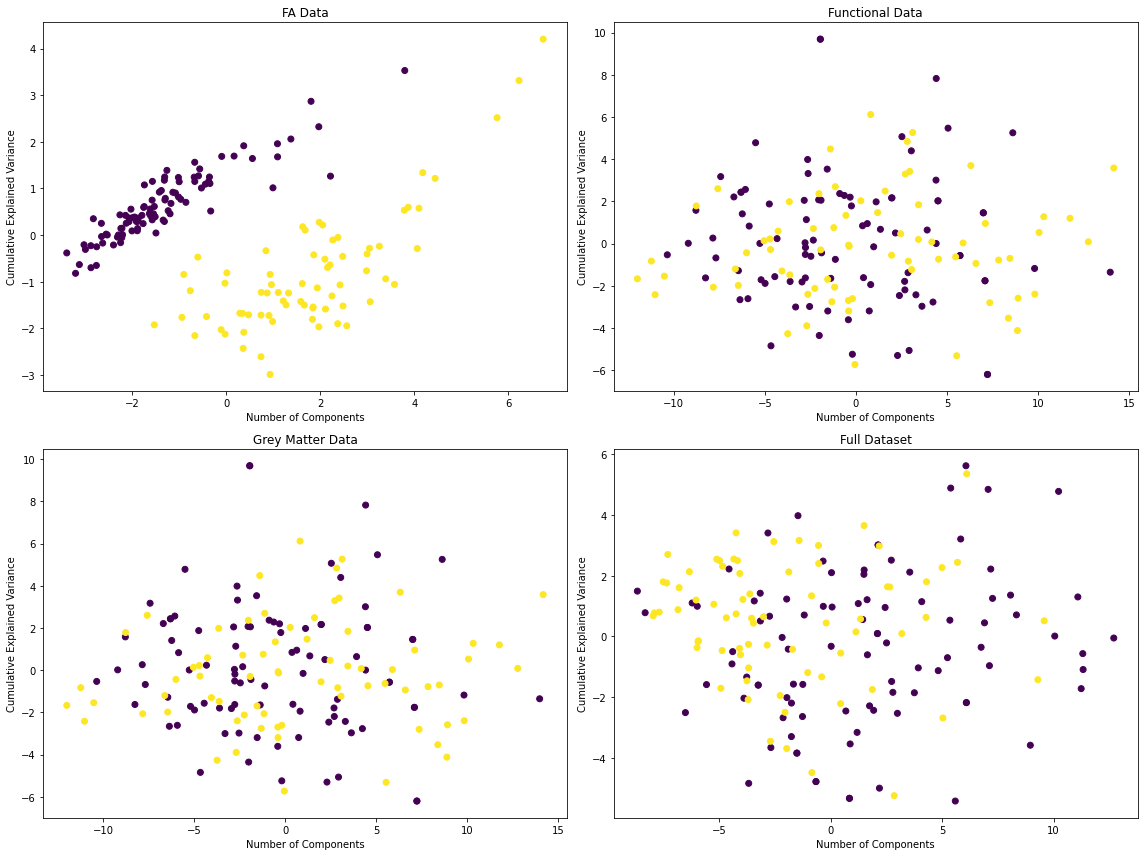

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

data = [fa_corr.iloc[:, :-5], func.iloc[:, :-5], gm.iloc[:, :-5], full_dataset.iloc[:, :-5]]
names = ["FA Data", "Functional Data", "Grey Matter Data", "Full Dataset"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))
scanner = [0 if "MSVIS" in name else 1 for name in fa.index]

for i in range(2):
    for j in range(2):
        pca_variables = data[i+j]
        pca = PCA(n_components=2)
        pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), pd.DataFrame(scanner, columns=["scanner"])], join="inner", axis=1)
        axs[i, j].scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

for i,ax in enumerate(axs.flat):
    ax.set(xlabel='Number of Components', ylabel='Cumulative Explained Variance', title=names[i])
    
fig.tight_layout()

In [12]:
#! #!pip install --upgrade --ignore-installed neuroCombat

In [13]:
# DATA
data = fa_corr.iloc[:, :-5].transpose()

# COVARS
index = [name for name in fa.index]
sample = [num for num in range(165)]
scanner = [0 if "MSVIS" in name else 1 for name in index]
age = [a for a in fa.iloc[:, -5]]
sex = [s for s in fa.iloc[:, -4]]
controls = [c for c in fa.iloc[:, -1]]

covars = pd.DataFrame(zip(index, sample, scanner, age, sex, controls), columns=["index", "sample", "scanner", "age", "sex", "class"])

# BATCH_COL
batch_col = "scanner"

# Continuous_cols

continuous_cols = ["age", "sex"]

# Categorical_cols

categorical_cols = ["class"]

In [14]:
covars.head()

,index,sample,scanner,age,sex,class
0,002MSVIS,0,0,51.53,1,1
1,003MSVIS,1,0,58.06,0,1
2,004MSVIS,2,0,60.78,1,1
3,005MSVIS,3,0,37.95,0,1
4,010MSVIS,4,0,52.64,0,1


In [15]:
#from neuroHarmonize import neuroCombat

from neuroCombat import neuroCombat

nc = neuroCombat(dat = data,
                        covars = covars,
                        batch_col = batch_col,
                        #continuous_cols= continuous_cols,
                        continuous_cols=None,
                        categorical_cols = categorical_cols)

harmonized_fa = pd.DataFrame(np.transpose(nc["data"]), index = fa.iloc[:, :-5].index, columns= fa.iloc[:, :-5].columns)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


/home/eloydelas/anaconda3/lib/python3.8/site-packages/neuroCombat/neuroCombat.py:324: RuntimeWarning: divide by zero encountered in true_divide
  change = max((abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max())


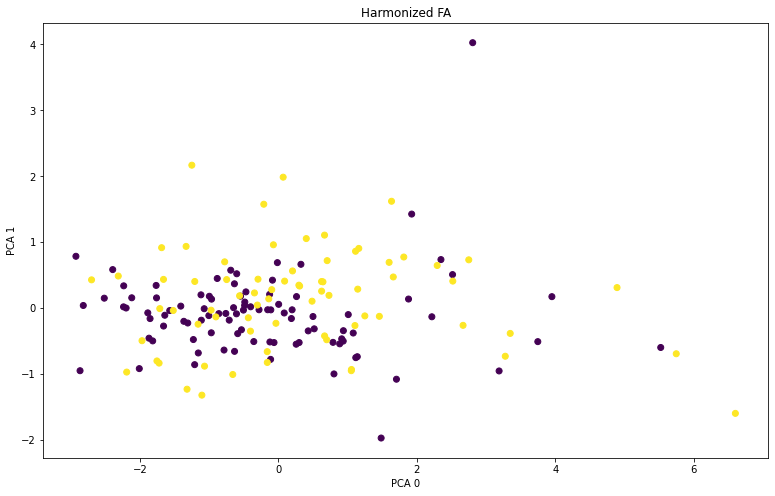

In [16]:
harmonized_fa[harmonized_fa < 0.1] = 0
pca_variables = harmonized_fa
pca = PCA(n_components=2)
pca_fa = pd.concat([pd.DataFrame(pca.fit_transform(pca_variables)), covars["scanner"]], join="inner", axis=1)
plt.figure(figsize=(13, 8))
plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.title("Harmonized FA")
plt.scatter(x=pca_fa[0], y=pca_fa[1], c=pca_fa["scanner"])

In [17]:
# Rows and columns that only had zeros have been removed.
harmonized_fa_filter = harmonized_fa.loc[(harmonized_fa.sum(axis=1) != 0), (harmonized_fa.sum(axis=0) != 0)]
#Include Nan values in Dataframe
harmonized_fa_filter=harmonized_fa_filter.replace(0, np.nan)
harmonized_fa_filter.reset_index(drop=True, inplace=True)
clinical_data.reset_index(drop=True, inplace=True)
#Join structural connectivity and clinical data
fa_har = pd.concat([harmonized_fa_filter, covars["class"]], join="inner", axis=1)

/home/eloydelas/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1282: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
/home/eloydelas/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1286: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


<AxesSubplot:xlabel='class', ylabel='fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal'>

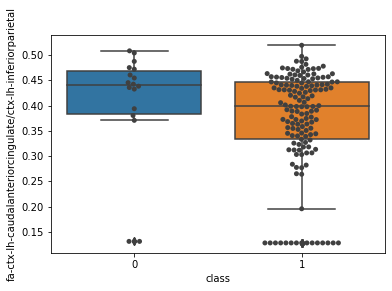

In [18]:
#Visualization
sns.boxplot(x=fa_har["class"],y=fa_har["fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal"])
sns.swarmplot(x=fa_har["class"],y=fa_har["fa-ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal"], color=".25")

## Step 3: Statistically significant connections with Bonferroni

In [19]:
#Collineality between connections
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


def types_diff(df):
    conn_stat=pd.DataFrame(columns=['ROI','pvalue'])
    feats = df.iloc[:, :-1].columns.to_list()
    for connections in feats:
        stat,p = shapiro(df[connections])
        alpha=0.05
        sample1 = df.loc[df["class"]==0,connections]
        sample2 = df.loc[df["class"]==1,connections]
        if p > alpha:
            stat, p = bartlett(sample1,sample2)
            homovar = True
            if (p<=0.05):
                homovar = False
            stat,p = ttest_ind(sample1,sample2,equal_var=homovar)
        else:
            stat,p = mannwhitneyu(df.loc[df["class"]==0,connections],df.loc[df["class"]==1,connections],alternative='two-sided')
    
        if (p<=0.05):
            conn_stat = conn_stat.append({'ROI': connections,'pvalue': p}, ignore_index=True)
        
    print('Statistically diferences in %d of connections' % len(conn_stat))
    return conn_stat


In [20]:
diff = types_diff(fa_har)

Statistically diferences in 556 of connections


In [21]:
from statsmodels.stats.multitest import multipletests
p_corr = multipletests(diff["pvalue"], alpha = 0.05, method = "bonferroni", is_sorted = False)
diff ["p_corr"] = p_corr[1] #Added the bonferroni correction
diff_fdr = diff[diff["p_corr"] < 0.05] #FDR correction with lowest pvalue
print('Statistically diferences in %d of connections with FDR' % len(diff_fdr))
diff_fa = diff_fdr["ROI"].tolist()
fa_clinic = fa.loc[:,["age", "sex", "dd", "edss", "controls_ms"]]
#Adding index fa_har
fa_har=fa_har.set_index(fa.index)
fa_har_bonferroni = fa_har[diff_fa]
fa_har_corr = pd.merge(fa_har_bonferroni, fa_clinic, left_index=True, right_index=True)
fa_har_corr.head()

Statistically diferences in 108 of connections with FDR


,fa-ctx-lh-caudalanteriorcingulate/Left-Caudate,fa-ctx-lh-cuneus/ctx-rh-superiorparietal,fa-ctx-lh-fusiform/ctx-lh-lateraloccipital,fa-ctx-lh-fusiform/ctx-lh-pericalcarine,fa-ctx-lh-inferiorparietal/ctx-rh-inferiorparietal,fa-ctx-lh-inferiorparietal/ctx-rh-superiorparietal,fa-ctx-lh-inferiortemporal/ctx-lh-lateraloccipital,fa-ctx-lh-inferiortemporal/ctx-lh-lingual,fa-ctx-lh-inferiortemporal/ctx-lh-pericalcarine,fa-ctx-lh-inferiortemporal/ctx-lh-postcentral,...,fa-ctx-rh-lingual/ctx-rh-middletemporal,fa-ctx-rh-lingual/ctx-rh-superiortemporal,fa-ctx-rh-parahippocampal/ctx-rh-pericalcarine,fa-ctx-rh-postcentral/ctx-rh-posteriorcingulate,fa-ctx-rh-posteriorcingulate/ctx-rh-precentral,age,sex,dd,edss,controls_ms
002MSVIS,0.355968,0.505874,0.342533,0.353460,0.507159,0.506969,0.376092,0.395853,0.386601,0.411566,...,0.398757,0.399310,0.310521,0.400789,0.435289,51.53,1,22.18,7.5,1
003MSVIS,0.278274,0.520217,0.298282,0.341397,0.474283,0.478323,0.339030,0.408441,0.415950,0.379841,...,0.440826,0.449097,0.358402,0.354511,0.350889,58.06,0,9.57,6.0,1
004MSVIS,0.325295,0.566796,0.341101,0.411798,0.513371,0.511516,0.424590,0.480935,0.486264,0.436807,...,0.477857,0.476338,0.390995,0.421782,0.448408,60.78,1,6.79,3.0,1
005MSVIS,0.364171,0.535451,0.367771,0.402481,0.522000,0.520109,0.408853,0.434703,0.438442,0.432742,...,0.467816,0.458121,0.367539,0.428881,0.436671,37.95,0,8.45,1.5,1
010MSVIS,0.352903,0.505018,0.344832,0.367309,0.477466,0.484280,0.396068,0.462009,0.468824,0.430848,...,0.408385,0.399312,0.358861,0.397030,0.408009,52.64,0,9.05,2.0,1


## Step 4: Machine learning algorithms

In [22]:
# Preprocessing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# Metrics
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [23]:
fa_har_new = fa_har_corr 
fa_har_new.head()

,fa-ctx-lh-caudalanteriorcingulate/Left-Caudate,fa-ctx-lh-cuneus/ctx-rh-superiorparietal,fa-ctx-lh-fusiform/ctx-lh-lateraloccipital,fa-ctx-lh-fusiform/ctx-lh-pericalcarine,fa-ctx-lh-inferiorparietal/ctx-rh-inferiorparietal,fa-ctx-lh-inferiorparietal/ctx-rh-superiorparietal,fa-ctx-lh-inferiortemporal/ctx-lh-lateraloccipital,fa-ctx-lh-inferiortemporal/ctx-lh-lingual,fa-ctx-lh-inferiortemporal/ctx-lh-pericalcarine,fa-ctx-lh-inferiortemporal/ctx-lh-postcentral,...,fa-ctx-rh-lingual/ctx-rh-middletemporal,fa-ctx-rh-lingual/ctx-rh-superiortemporal,fa-ctx-rh-parahippocampal/ctx-rh-pericalcarine,fa-ctx-rh-postcentral/ctx-rh-posteriorcingulate,fa-ctx-rh-posteriorcingulate/ctx-rh-precentral,age,sex,dd,edss,controls_ms
002MSVIS,0.355968,0.505874,0.342533,0.353460,0.507159,0.506969,0.376092,0.395853,0.386601,0.411566,...,0.398757,0.399310,0.310521,0.400789,0.435289,51.53,1,22.18,7.5,1
003MSVIS,0.278274,0.520217,0.298282,0.341397,0.474283,0.478323,0.339030,0.408441,0.415950,0.379841,...,0.440826,0.449097,0.358402,0.354511,0.350889,58.06,0,9.57,6.0,1
004MSVIS,0.325295,0.566796,0.341101,0.411798,0.513371,0.511516,0.424590,0.480935,0.486264,0.436807,...,0.477857,0.476338,0.390995,0.421782,0.448408,60.78,1,6.79,3.0,1
005MSVIS,0.364171,0.535451,0.367771,0.402481,0.522000,0.520109,0.408853,0.434703,0.438442,0.432742,...,0.467816,0.458121,0.367539,0.428881,0.436671,37.95,0,8.45,1.5,1
010MSVIS,0.352903,0.505018,0.344832,0.367309,0.477466,0.484280,0.396068,0.462009,0.468824,0.430848,...,0.408385,0.399312,0.358861,0.397030,0.408009,52.64,0,9.05,2.0,1


In [24]:
def evaluation(X, y):
    logistic_model = LogisticRegression(max_iter=450)
    scores = cross_val_score(logistic_model, X, y, cv=5, scoring="f1")
    print(scores.mean())

evaluation(fa_har_new.iloc[:, :-5], fa_har_new.iloc[:, -1])

0.9422427035330261


In [25]:
sc = StandardScaler()
target = fa_har_new.iloc[:, -1]
standarized_fa = sc.fit_transform(fa_har_new.iloc[:, :-5])
standarized_fa = pd.DataFrame(standarized_fa, index=fa_har_new.iloc[:, :-5].index, columns=fa_har_new.iloc[:, :-5].columns)

evaluation(standarized_fa, target)

0.8971565113500597


* Support Vector Classification

In [31]:
#! pip install imblearn #imbalanced-learn documentation
#! pip install xgboost

     |████████████████████████████████| 166.7 MB 61 kB/s s eta 0:00:01   |████▉                           | 25.0 MB 2.7 MB/s eta 0:00:53     |█████████████████████████       | 130.6 MB 25.1 MB/s eta 0:00:02


Optimal parameters: {'C': array([7.9040187]), 'gamma': array([0.00687381])}
Best accuracy values: 94.89 +/- 3.77 %
Range of accuracy btween different combinations: [90.91, 94.89] %


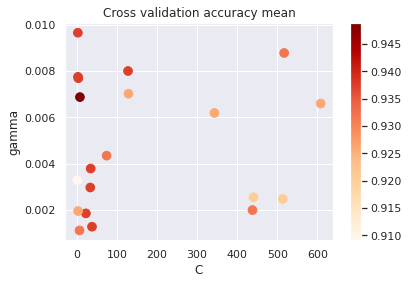

TRAINING AND ASSESSMENT
Accuracy value of 81.82%
Sensitivity: 86.44%
Specificity: 42.86%


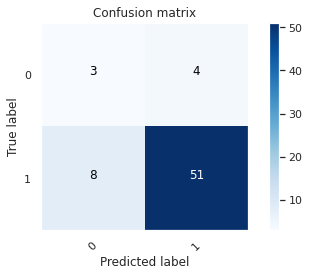

In [27]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from analysistools import exp_uniform, search_SVCconf, plot_confusion_matrix, fit_and_evaluate, plot_topfeatures

X_train, X_test, y_train, y_test = train_test_split(standarized_fa, target, test_size=0.4, random_state=2019, stratify=target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Balancear las clases
sm = SMOTE(random_state=2019)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

# Parametros para conf con scaler
param_dist = {"C": exp_uniform(0, 3),
              "gamma": exp_uniform(-3, -2)}

C_opt,gamma_opt = search_SVCconf(X_train_res,y_train_res,param_dist,'rbf')

cm1,clf = fit_and_evaluate(X_train_res,y_train_res,X_test,y_test,C_opt,gamma_opt)

* SVM

Optimal parameters: {'C': array([4.01224219])}
Best accuracy values: 92.61 +/- 8.73 %
Range of accuracy btween different combinations: [87.50, 92.61] %


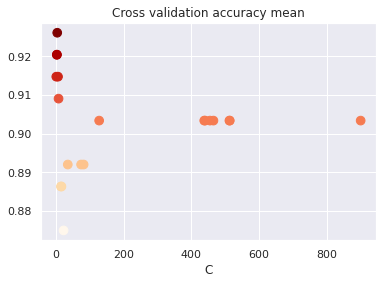

TRAINING AND ASSESSMENT
Accuracy value of 80.30%
Sensitivity: 83.05%
Specificity: 57.14%


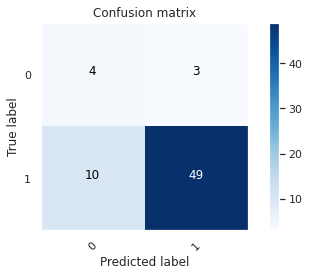

In [28]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(standarized_fa, target, test_size=0.4, random_state=2019, stratify=target)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Balancear las clases
sm = SMOTE(random_state=2019)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


param_dist = {"C": exp_uniform(0, 3)}

C_opt = search_SVCconf(X_train_res,y_train_res,param_dist,'linear')

cm1,clf = fit_and_evaluate(X_train_res,y_train_res,X_test,y_test,C_opt)


* XGBoost

In [47]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(standarized_fa, target, test_size=0.4, random_state=2019, stratify=target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Balancear las clases
sm = SMOTE(random_state=2019)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)


# Create XGB Classifier object
xgb_clf = XGBClassifier()

# Create parameter grid
parameters = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 1.5, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.3, 0.6, 0.8, 1.0],
               "subsample": [0.2, 0.4, 0.5, 0.6, 0.7],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 1.5, 2, 3, 4.5],
               "min_child_weight": [1, 3, 5, 7],
               "eval_metric":'mlogloss',
               "n_estimators": [100, 250, 500, 1000]}


# Create RandomizedSearchCV Object
xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters, scoring = "accuracy",
                             cv = 4, random_state = 2019 )

# Fit the model
xgb_model = xgb_rscv.fit(X_train_res, y_train_res)

best_score_std = xgb_model.cv_results_['std_test_score'][xgb_model.best_index_]
print("Optimal parameters: {}".format(xgb_model.best_params_))
print("Best accuracy: {0:.2f} +/- {1:.2f} %".format(xgb_model.best_score_*100, 2*best_score_std*100))

print('TEST-----')
y_pred = xgb_model.predict(X_test)

score1 = accuracy_score(y_test, y_pred, normalize=True)
print('Accuracy value of ' + "{0:.2f}".format(score1*100) + '%')
cm1 = confusion_matrix(y_test, y_pred)

fvp = cm1[1,1] / (cm1[1,0]+cm1[1,1])
fvn = cm1[0,0] / (cm1[0,0]+cm1[0,1])
print('Sensibility: ' + "{0:.2f}".format(fvp*100) + '%')
print('Especificity: ' + "{0:.2f}".format(fvn*100) + '%')

XGBoostError: [15:33:39] ../src/metric/metric.cc:49: Unknown metric function s
Stack trace:
  [bt] (0) /home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7fc5798c633f]
  [bt] (1) /home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1fcd0f) [0x7fc579a31d0f]
  [bt] (2) /home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1d2378) [0x7fc579a07378]
  [bt] (3) /home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1b9829) [0x7fc5799ee829]
  [bt] (4) /home/eloydelas/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x50) [0x7fc5798b5ed0]
  [bt] (5) /home/eloydelas/anaconda3/lib/python3.8/lib-dynload/../../libffi.so.7(+0x69dd) [0x7fc628c169dd]
  [bt] (6) /home/eloydelas/anaconda3/lib/python3.8/lib-dynload/../../libffi.so.7(+0x6067) [0x7fc628c16067]
  [bt] (7) /home/eloydelas/anaconda3/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x10da8) [0x7fc628c2cda8]
  [bt] (8) /home/eloydelas/anaconda3/lib/python3.8/lib-dynload/_ctypes.cpython-38-x86_64-linux-gnu.so(+0x1108c) [0x7fc628c2d08c]



# 2. rsfMRI and GM networks correction matrices

In [ ]:
# rsfMRI
func_corrected = np.zeros(func.shape)


#Correct for age and sex the connectivity matrices
for i in range(func.shape[1]):
    Y = func.values[:,i] #Extract the values inside matrix
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    y_pred = regr.predict(X)
    residual = (Y - y_pred)
    val_corrected = residual + mean(Y)
    # save values
    func_corrected[:,i] = val_corrected
    
func_corrected = np.abs(func_corrected)
func_corrected[func_corrected < 0.1] = 0 #We remove the values bellow 0.1

##Select the index and columns from the original Dataframe
names = func.index.tolist()
columns = func.columns.values.tolist()
df2=pd.DataFrame(func_corrected,columns=[columns], index=[names])
func_corr=df2.iloc[:, :-5]

func_corr.head()

In [ ]:
# GM network
gm_corrected = np.zeros(gm.shape)


#Correct for age and sex the connectivity matrices
for i in range(gm.shape[1]):
    Y = gm.values[:,i] #Extract the values inside matrix
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    y_pred = regr.predict(X)
    residual = (Y - y_pred)
    val_corrected = residual + mean(Y)
    # save values
    gm_corrected[:,i] = val_corrected

gm_corrected[gm_corrected < 0.1] = 0 #We remove the values bellow 0.1
    
##Select the index and columns from the original Dataframe
names = gm.index.tolist()
columns = gm.columns.values.tolist()
df3=pd.DataFrame(gm_corrected,columns=[columns], index=[names])
gm_corr=df3.iloc[:, :-5]

gm_corr.head()

## 5. Combination of the different networks of GM (rsfMRI and GM correlations), using as interlink the FA-weighted values and data normalization for each subject in range [0-1]

In [ ]:
GM_avg = (func_corr.values + gm_corr.values) / 2
network = GM_avg*harmonized_fa
network.head()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing


network_normalized = np.zeros(network.shape)

for i in range(network.shape[1]):
    Y = network.values[:,i] #Extract the values inside matrix
    # normalize the data attributes: It seems scikit-learn expects ndarrays with at most two dims. So, to solve it would be to reshape to 2D, 
    #feed it to normalize that gives us a 2D array, which could be reshaped back to original shape
    network_normalized[:,i] = preprocessing.normalize(Y.reshape(Y.shape[0],-1), norm='max', axis=0).reshape(Y.shape) 

In [ ]:
#